## Confusion Matrix
![resim](22.jpg)

* 1000000 --->  990000 kedi  10000 köpek  accuracy %99  ---> 0 köpek doğru tahmininde bile 99 doğruluk oranı oldu bu mantığa göre iste bunu görebilmek adına confusion matrisine ihtiyaç var
* saedece accuracy bakmak yanıltır
* 

In [9]:
import pandas as pd
import numpy as np

In [11]:
data = pd.read_csv("data.csv")
data.drop(["id","Unnamed: 32"],axis=1,inplace = True)

In [13]:
data.diagnosis = [ 1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

In [15]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state = 42)

In [19]:
#%%  random forest
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train,y_train)
print("random forest algo result: ",rf.score(x_test,y_test))

random forest algo result:  0.9534883720930233


In [23]:
y_pred = rf.predict(x_test)
y_true = y_test
#%% confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)
cm

array([[53,  1],
       [ 3, 29]], dtype=int64)

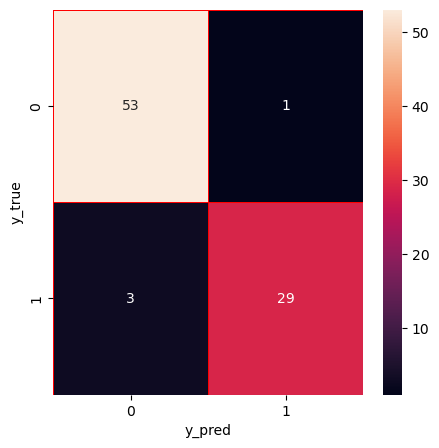

In [25]:
# %% cm visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [27]:
# 0 iyi huylu 1 kötü huylu